### torchvision 제공 이미지 전처리 관련 기능
- torchvision.transforms 서브모듈
    - 이미지 크기 조걸
    - 이미지 정규화
    - 이미지 자르기
    - 이미지 회전 등등 다양한 기능 제공
    - 이미지 데이터 타입 ==> Pillow Image

- 모듈로딩 및 데이터 설정 <hr>

In [22]:
import cv2                          # 이미지 데이터 ndarray
import torch
from PIL import Image               # 이미지 데이터  JPEG IMAGE
import numpy as np                  # pythorch 지원 이미지 변환 관련 모듈 
from torchvision.transforms import v2

import matplotlib.pyplot as plt
from torchvision import transforms

In [23]:
## 데이터 관련 설정
IMG_PATH='../image/'
IMG_FILE= IMG_PATH+'song.jpg'
#IMG_FILE= IMG_PATH+'ele.jpg'

- openCV & pillow <hr>

In [24]:
cv_img=cv2.imread(IMG_FILE)
cv_img=cv2.cvtColor(cv_img,cv2.COLOR_BGR2RGB)   # BGR => RGB

pil_img=Image.open(IMG_FILE)

In [25]:
print(f'type(cv_img) : {type(cv_img)}')
print(f'type(pil_img) : {type(pil_img)}')

type(cv_img) : <class 'numpy.ndarray'>
type(pil_img) : <class 'PIL.JpegImagePlugin.JpegImageFile'>


- 인스턴스 와 메서드 <hr>
    - 인스턴스(Instance) :  메모리(힙)에 존재하는(저장된) 데이터의 종류를 명시해서 부르는 용어
        -예) 정수 인스턴스, vgg 인스턴스, 사람 인스턴스
    - 속성(Attribute/Field) : 클래스가 가지는 특징, 외형, 내형, 성격
    - 메서드(Method) : 클래스가 가지는 기능, 역할  ==> 문법 구조는 함수와 동일

In [26]:
class A:

    # 인스턴스를 생성해주는 메서드
    def __init__(self,num,loc):
        self.num=num    # 인스턴스 속성
        self.loc=loc    # 인스턴스 속성
    # 연산자(+,-,*,/,//,%,**)기능과 연결된 매직 메서드
    def __add__(self,other):
        print('__add()')
        return self.num+other.num
    
    def __mul__(self,other):
        print('__mul__()')
        return self.loc*other
    
    # 인스턴스 변수명으로 호출되는 메서드
    def __call__(self,value):
        print('__call__()')
    
    # A클래스로 생성된 인스턴스 전용의 메서드
    def test(self,food):
        print(self.loc,food)


In [27]:
# 인스턴스 생성 => A(10,'대구')
a1=A(10,'대구')
print(a1.loc)

a1.test('치맥')

a1*7

A(5,'경주')(8888)


대구
대구 치맥
__mul__()
__call__()


- Resize 이미지 크기 변경 <hr>

In [41]:
### v2.Resize() 클래스
# img => Tensor
print(cv_img.shape)

imgTS=v2.ToImage()(cv_img)
imgTS2=v2.Resize(size=(40,20))(imgTS)
imgTS3=v2.Resize(size=(100,320),interpolation=v2.InterpolationMode.BILINEAR)(imgTS)

print(imgTS2.shape)
print(imgTS3.shape)

(1536, 1152, 3)
torch.Size([3, 40, 20])
torch.Size([3, 100, 320])


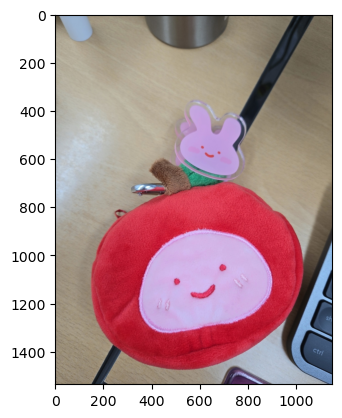

In [35]:
plt.imshow(imgTS.permute(1,2,0))

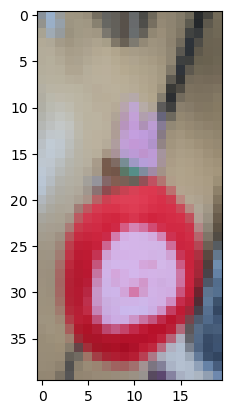

In [33]:
plt.imshow(imgTS2.permute(1,2,0))

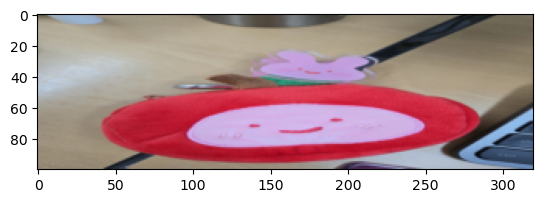

In [42]:
plt.imshow(imgTS3.permute(1,2,0))

In [43]:
### v2.Compose() 클래스 : 이미지에 진행할 여러가지 전처리를 하나로 묶음 처리 즉. pipeline 설정
print(cv_img.shape)

trans=v2.Compose(
    [
        v2.ToImage(),
        v2.Resize(size=(230,120),interpolation=v2.InterpolationMode.BILINEAR)
    ]
)
imgTS=trans(cv_img)

print(imgTS.shape)

(1536, 1152, 3)
torch.Size([3, 230, 120])


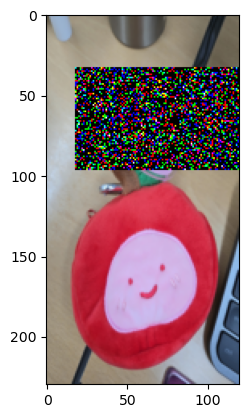

In [213]:
aa=transforms.RandomErasing(p=1,value='random')(imgTS)
plt.imshow(aa.permute(1,2,0))

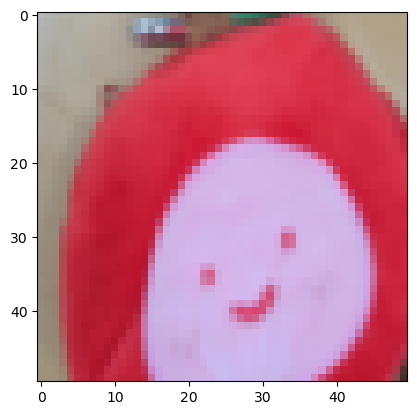

In [205]:
aa=transforms.RandomResizedCrop(size=50)(imgTS)
plt.imshow(aa.permute(1,2,0))